In [103]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from ift6758.features.feature_engineering1 import SeasonDataSet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Get Train and Test Data

In [105]:
train_years = [2015,2016,2017,2018]
test_years=[2019]

In [106]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [107]:
test_dataset = SeasonDataSet(test_years)
test_df = test_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2019_period_info.pkl


In [108]:
features = ["distanceNet","angleNet"]
label_column = "isGoal"

In [109]:
train_df

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,10.007980
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-4.085617
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-46.636577
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-2.045408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338503,Goal,2018040643,Team Central,2,08:30,REGULAR,01:30,-72.0,4.0,Wrist Shot,False,Even,Mikko Rantanen,Braden Holtby,"(89, 0)",1,161.049682,-1.423205
338504,Goal,2018040643,Team Central,2,08:50,REGULAR,01:10,-66.0,1.0,Wrist Shot,False,Even,Blake Wheeler,Braden Holtby,"(89, 0)",1,155.003226,-0.369645
338505,Goal,2018040643,Team Metropolitan,2,09:08,REGULAR,00:52,76.0,-23.0,Wrist Shot,False,Even,Cam Atkinson,Pekka Rinne,"(89, 0)",1,26.419690,60.524111
338506,Shot,2018040643,Team Central,2,09:21,REGULAR,00:39,-75.0,-3.0,Backhand,0,NaN,Mark Scheifele,Braden Holtby,"(89, 0)",0,164.027437,1.047977


In [110]:
train_df = train_df[['distanceNet', 'angleNet', 'isGoal']]
test_df = test_df[['distanceNet', 'angleNet', 'isGoal']]
train_df, test_df

(        distanceNet   angleNet  isGoal
 0         34.525353  10.007980       0
 1         10.000000   0.000000       0
 2         14.035669  -4.085617       0
 3         49.517674 -46.636577       0
 4         28.017851  -2.045408       0
 ...             ...        ...     ...
 338503   161.049682  -1.423205       1
 338504   155.003226  -0.369645       1
 338505    26.419690  60.524111       1
 338506   164.027437   1.047977       0
 338507    19.416488  11.888658       0
 
 [338415 rows x 3 columns],
        distanceNet   angleNet  isGoal
 0       124.458829  -8.781163       0
 1        26.627054  34.286877       0
 2       129.031004 -14.359337       0
 3        50.695167  22.011283       1
 4       160.028123   1.074170       1
 ...            ...        ...     ...
 83052   163.370744   3.860733       1
 83053   158.050625  -1.450216       0
 83054   173.288776   3.308214       0
 83055   163.306460   3.510678       1
 83056    29.732137 -47.726311       0
 
 [82987 rows x 3 col

# Some EDA

In [111]:
# Get weather type counts
label_dict = {0: 'Shots',
              1: 'Goals'
             }

label_list = list(label_dict.values())

class_counts = [train_df.isGoal.value_counts()[i] for i in range(0,2)]

label_counts = sorted(list(zip(label_list, class_counts)), 
                     key=lambda x:x[1], reverse=True)

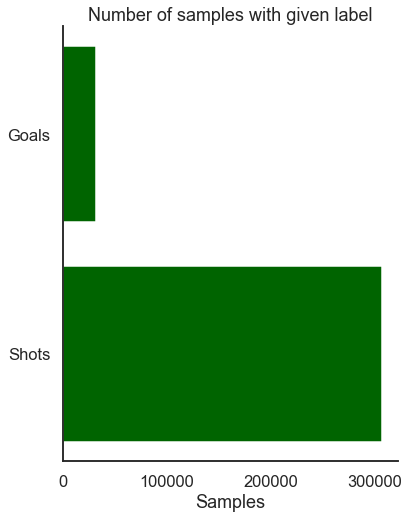

In [112]:
# Plot weather type counts
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(6,8))
plt.barh(width=[x[1] for x in label_counts], 
         y=[x[0] for x in label_counts], 
         color='darkgreen')
plt.yticks(ticks=list(range(0,2)), labels=[x[0] for x in label_counts])
plt.xlabel('Samples')
plt.title('Number of samples with given label')
sns.despine()
plt.show();

In [113]:
train_df.isGoal.value_counts()

0    306667
1     31748
Name: isGoal, dtype: int64

# Generate Train and Validation Splits

In [114]:
X = train_df.drop('isGoal', axis=1)
Y = train_df['isGoal']
testX = test_df.drop('isGoal', axis=1)
testY = test_df['isGoal']
X, Y, testX, testY

(        distanceNet   angleNet
 0         34.525353  10.007980
 1         10.000000   0.000000
 2         14.035669  -4.085617
 3         49.517674 -46.636577
 4         28.017851  -2.045408
 ...             ...        ...
 338503   161.049682  -1.423205
 338504   155.003226  -0.369645
 338505    26.419690  60.524111
 338506   164.027437   1.047977
 338507    19.416488  11.888658
 
 [338415 rows x 2 columns],
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 338503    1
 338504    1
 338505    1
 338506    0
 338507    0
 Name: isGoal, Length: 338415, dtype: int64,
        distanceNet   angleNet
 0       124.458829  -8.781163
 1        26.627054  34.286877
 2       129.031004 -14.359337
 3        50.695167  22.011283
 4       160.028123   1.074170
 ...            ...        ...
 83052   163.370744   3.860733
 83053   158.050625  -1.450216
 83054   173.288776   3.308214
 83055   163.306460   3.510678
 83056    29.732137 -47.726311
 
 [82987 rows x 2 columns

In [115]:
trainX, valX, trainY, valY = train_test_split(X, Y, test_size=0.20, stratify=Y) #80-20 Split
trainX, valX, trainY, valY

(        distanceNet   angleNet
 260839    47.853944  26.029592
 226485    23.345235   9.865807
 137844    25.079872 -23.498566
 231808    33.541020  26.565051
 131341     7.211103 -33.690068
 ...             ...        ...
 310612    28.017851  55.175511
 8285      28.017851 -55.175511
 102651    13.000000   0.000000
 280989    20.615528  39.093859
 20832     63.953108 -26.965714
 
 [270732 rows x 2 columns],
         distanceNet   angleNet
 280084    24.041631 -45.000000
 81950      7.810250  50.194429
 149454    14.560220 -15.945396
 256621    16.970563 -45.000000
 304081    12.806248  38.659808
 ...             ...        ...
 65717     52.009614 -37.971604
 276758     9.848858 -23.962489
 142642     5.385165 -21.801409
 160964    28.319605 -47.862405
 243484    20.396078 -78.690068
 
 [67683 rows x 2 columns],
 260839    0
 226485    0
 137844    1
 231808    0
 131341    0
          ..
 310612    0
 8285      0
 102651    0
 280989    0
 20832     0
 Name: isGoal, Length: 270732,

In [116]:
# Save raw copies of train and validation sets before further preprocessing
X_train_raw = trainX.copy()
y_train_raw = trainY.copy()

X_val_raw = valX.copy()
y_val_raw = valY.copy()

In [167]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(trainX)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1
0,0.252142,0.554952
1,0.123006,0.508231
2,0.132146,0.411792
3,0.176728,0.556500
4,0.037995,0.382334
...,...,...
270727,0.147626,0.639198
270728,0.147626,0.320231
270729,0.068497,0.479714
270730,0.108623,0.592714


In [168]:
# Check the results
X_scaled.describe()

,0,1
count,270732.000000,270732.000000
mean,0.208984,0.482006
std,0.167499,0.104708
min,0.000000,0.000000
25%,0.092170,0.402929
50%,0.180073,0.479714
75%,0.268719,0.560857
max,1.000000,1.000000


In [165]:
# Build a pipeline for the preprocessing steps
pipe_prepro = Pipeline([('scaler', MinMaxScaler())])
# Fit the pipeline and transform the training dataset
X_train_trans = pipe_prepro.fit_transform(trainX)
# Use the pipeline to transform the validation and test datasets
X_val_trans = pipe_prepro.transform(valX)
X_test_trans = pipe_prepro.transform(testX)

# Some Helper Functions

In [120]:
# Define a function to print selected model metrics
def print_metrics(y_true, y_pred):
    '''Print accuracy score, confusion matrix, and classification report.
    
    Keyword arguments:
    y_true: groud-truth labels
    y_pred: predicted labels
    
    Dependencies: 
    sklearn.metrics.accuracy_score
    sklearn.metrics.confusion_matrix
    sklearn.metrics.classification_report
    '''
    acc_score = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print('Accuracy:', acc_score)
    print('-------')
    print('Confusion matrix:')
    print(conf_matrix)
    print('-------')
    print('Classification report:')
    print(class_report)
    
# Define a function to make the ROC-AUC Curves
def roc_it(y_true, y_pred, model_name, figsize=(12,10)):
    '''Plot ROC with a separate curve for each class.
    
        Keyword arguments:
    y_true: ground-truth labels
    y_pred: predicted labels
    model_name: name to print in the plot title
    
    Dependencies:
    pandas aliased as pd
    sklearn.metrics.roc_curve
    sklearn.metrics.auc
    matplotlib.pyplot aliased as plt
    '''
    y_true_dum = pd.get_dummies(y_true)
    y_pred_dum = pd.get_dummies(y_pred)
    n_classes = y_true.nunique()
    
    fprs = []
    tprs = []
    aucs = []

    for i in range(0,n_classes-1):
        fpr, tpr, _ = roc_curve(y_true_dum.loc[:,i], y_pred_dum.loc[:,i])
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(round(auc(fpr, tpr),2))
        
    plt.figure(figsize=(12,10))
    for i in range(0, n_classes-1):
        plt.plot(fprs[i], tprs[i], label='Class: {}, AUC: {}'.format(i, 
                                                                     aucs[i]))
    plt.plot([0.0,1.0], [0.0,1.0], linestyle='--')
    plt.title('ROC curves by class for {}'.format(model_name))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

# Logitic Regression with features DistanceNet

In [175]:
# Fit and score a Logistic Classifier
LR1 = LogisticRegression()
LR1.fit(X_train_trans[:,0].reshape(-1,1), trainY)
train_pred = LR1.predict(X_train_trans[:,0].reshape(-1,1))
print_metrics(trainY, train_pred)

C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9061876689863038
-------
Confusion matrix:
[[245334      0]
 [ 25398      0]]
-------
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    245334
           1       0.00      0.00      0.00     25398

    accuracy                           0.91    270732
   macro avg       0.45      0.50      0.48    270732
weighted avg       0.82      0.91      0.86    270732



C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
# Validate
val_pred = LR1.predict(X_val_trans[:,0].reshape(-1,1))
val_prob = LR1.predict_proba(X_val_trans[:, 0].reshape(-1,1))[:, 1]
print_metrics(valY, val_pred)

Accuracy: 0.9061802816069028
-------
Confusion matrix:
[[61333     0]
 [ 6350     0]]
-------
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61333
           1       0.00      0.00      0.00      6350

    accuracy                           0.91     67683
   macro avg       0.45      0.50      0.48     67683
weighted avg       0.82      0.91      0.86     67683



C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

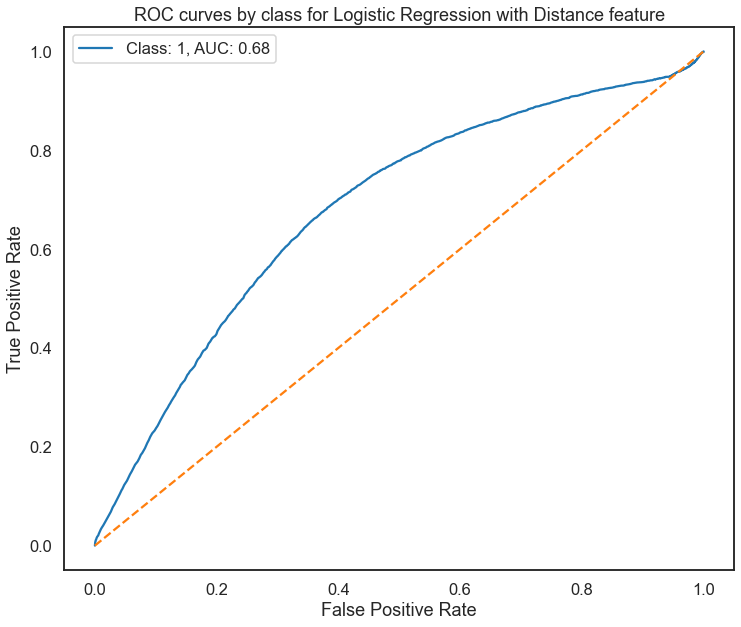

In [181]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(valY, val_prob)
aucs = round(auc(fpr, tpr),2)
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, label='Class: 1, AUC: {}'.format(aucs))
plt.plot([0.0,1.0], [0.0,1.0], linestyle='--')
plt.title('ROC curves by class for Logistic Regression with Distance feature')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#roc_it(valY, val_pred, 'Logistic Regression 1')

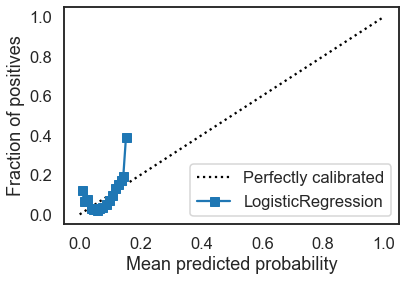

In [180]:
#Plot Calibration Curves
disp = CalibrationDisplay.from_estimator(LR1, X_val_trans[:,0].reshape(-1,1), valY, n_bins=100)
plt.show()

# Logitic Regression with features AngleNet 

In [172]:
# Fit and score a Logistic Classifier
LR2 = LogisticRegression()
LR2.fit(X_train_trans[:,1].reshape(-1,1), trainY)
train_pred = LR2.predict(X_train_trans[:,1].reshape(-1,1))
print_metrics(trainY, train_pred)

C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9061876689863038
-------
Confusion matrix:
[[245334      0]
 [ 25398      0]]
-------
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    245334
           1       0.00      0.00      0.00     25398

    accuracy                           0.91    270732
   macro avg       0.45      0.50      0.48    270732
weighted avg       0.82      0.91      0.86    270732



C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
# Validate
val_pred = LR2.predict(X_val_trans[:,1].reshape(-1,1))
print_metrics(valY, val_pred)

Accuracy: 0.9061802816069028
-------
Confusion matrix:
[[61333     0]
 [ 6350     0]]
-------
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61333
           1       0.00      0.00      0.00      6350

    accuracy                           0.91     67683
   macro avg       0.45      0.50      0.48     67683
weighted avg       0.82      0.91      0.86     67683



C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

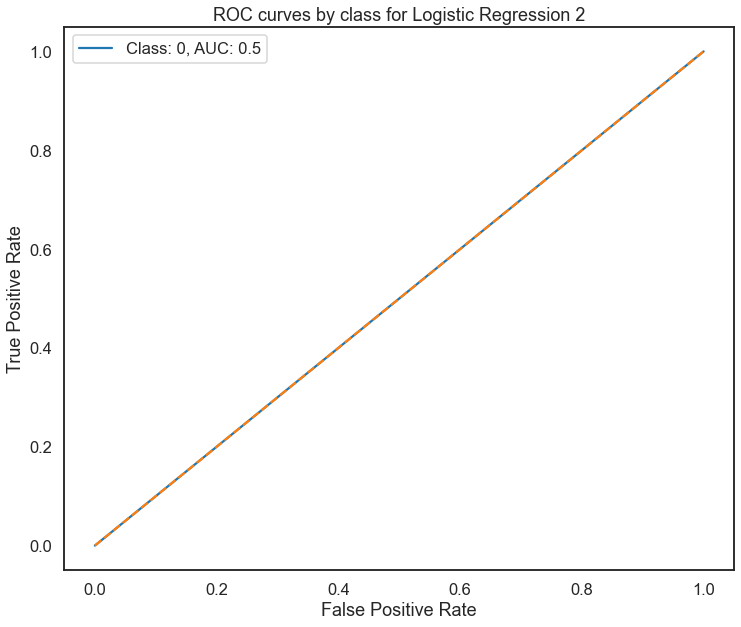

In [174]:
# Plot ROC curve for each class
roc_it(valY, val_pred, 'Logistic Regression 2')

# Logitic Regression with features AngleNet and DistanceNet

In [87]:
# Fit and score a Logistic Classifier
LR3 = LogisticRegression()
LR3.fit(X_train_trans, trainY)
train_pred = LR3.predict(X_train_trans)
print_metrics(trainY, train_pred)

C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

Accuracy: 0.9061876689863038
-------
Confusion matrix:
[[245334      0]
 [ 25398      0]]
-------
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    245334
           1       0.00      0.00      0.00     25398

    accuracy                           0.91    270732
   macro avg       0.45      0.50      0.48    270732
weighted avg       0.82      0.91      0.86    270732



In [88]:
# Validate
val_pred = LR3.predict(X_val_trans)
print_metrics(valY, val_pred)

Accuracy: 0.9061802816069028
-------
Confusion matrix:
[[61333     0]
 [ 6350     0]]
-------
Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     61333
           1       0.00      0.00      0.00      6350

    accuracy                           0.91     67683
   macro avg       0.45      0.50      0.48     67683
weighted avg       0.82      0.91      0.86     67683



C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\callr\Anaconda3\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

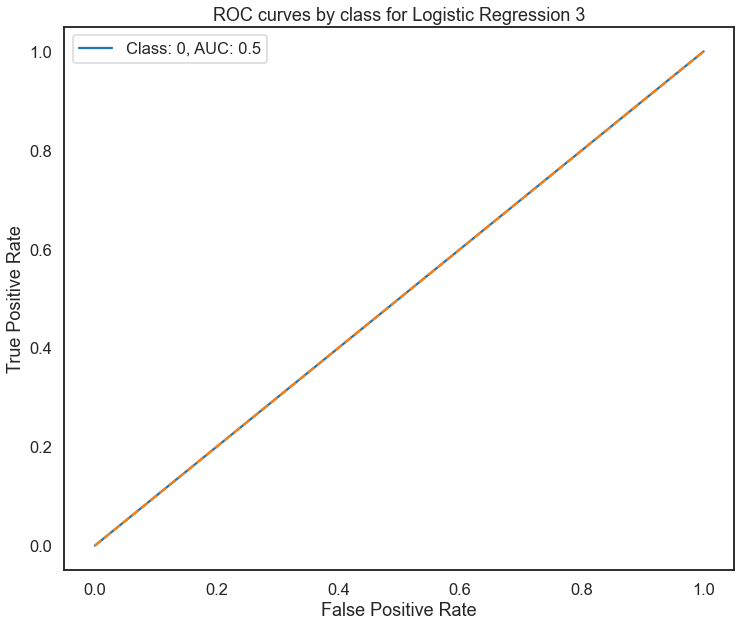

In [ ]:
# Plot ROC curve for each class
roc_it(valY, val_pred, 'Logistic Regression 3')